#**DNN (Wine, Iris)**

Decision Trees, naïve Bayes, k-nearest neighbour and SVM (linear and RBF), DNN

In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data preparation
from sklearn.model_selection import train_test_split

# metrics and evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# decision tree
from sklearn import tree

# naive bayes
from sklearn.naive_bayes import GaussianNB

# Decision Tree

***Iris dataset***

80/20

In [5]:
class Classifier:

    def __init__(self, name, accuracy, confusion_matrix, report):

        self.name = name
        self.accuracy = accuracy
        self.confusion_matrix = confusion_matrix
        self.report = report

iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

x_train80, x_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2)
x_train50, x_test50, y_train50, y_test50 = train_test_split(X, y, test_size=0.5)


[[12  0  0]
 [ 0  7  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



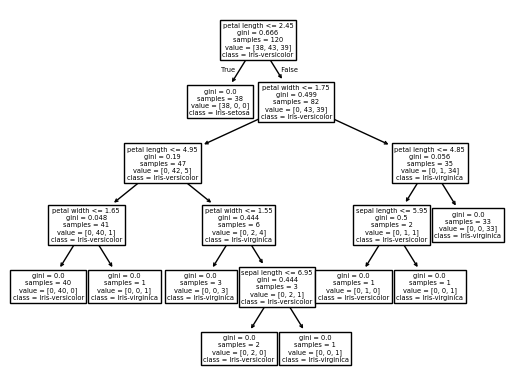

In [6]:
model = tree.DecisionTreeClassifier()

model.fit(x_train80, y_train80.to_numpy().ravel())

model_pred = model.predict(x_test20)

print(confusion_matrix(y_test20, model_pred))
print(classification_report(y_test20, model_pred))

tree.plot_tree(model, feature_names = iris.data.headers, class_names = np.unique(y))

iris_tree_8020 = Classifier('Decision Tree 80/20', accuracy_score(y_test20, model_pred), confusion_matrix(y_test20, model_pred), classification_report(y_test20, model_pred))

50/50

[[26  0  0]
 [ 0 19  2]
 [ 0  4 24]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        26
Iris-versicolor       0.83      0.90      0.86        21
 Iris-virginica       0.92      0.86      0.89        28

       accuracy                           0.92        75
      macro avg       0.92      0.92      0.92        75
   weighted avg       0.92      0.92      0.92        75



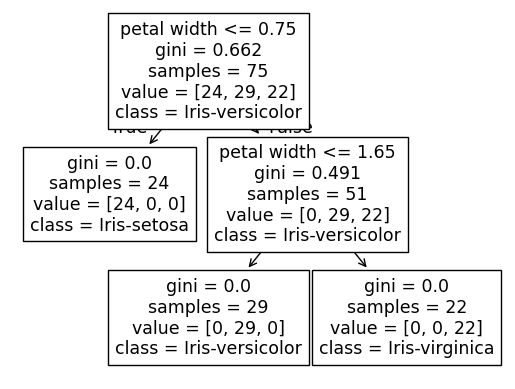

In [7]:
model = tree.DecisionTreeClassifier()

model.fit(x_train50, y_train50.to_numpy().ravel())

model_pred = model.predict(x_test50)

print(confusion_matrix(y_test50, model_pred))
print(classification_report(y_test50, model_pred))

tree.plot_tree(model, feature_names = iris.data.headers, class_names = np.unique(y))

iris_tree_5050 = Classifier('Decision Tree 50/50', accuracy_score(y_test50, model_pred), confusion_matrix(y_test50, model_pred), classification_report(y_test50, model_pred))

# Naive Bayes
80/20

In [8]:
model = GaussianNB()

model.fit(x_train80, y_train80.to_numpy().ravel())

model_pred = model.predict(x_test20)

print(confusion_matrix(y_test20, model_pred))
print(classification_report(y_test20, model_pred))

iris_bayes_8020 = Classifier('Naïve-Bayes 80/20', accuracy_score(y_test20, model_pred), confusion_matrix(y_test20, model_pred), classification_report(y_test20, model_pred))

[[12  0  0]
 [ 0  7  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



50/50

In [9]:
model = GaussianNB()

model.fit(x_train50, y_train50.to_numpy().ravel())

model_pred = model.predict(x_test50)

print(confusion_matrix(y_test50, model_pred))
print(classification_report(y_test50, model_pred))

iris_bayes_5050 = Classifier('Naïve-Bayes 50/50', accuracy_score(y_test50, model_pred), confusion_matrix(y_test50, model_pred), classification_report(y_test50, model_pred))

[[26  0  0]
 [ 0 19  2]
 [ 0  3 25]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        26
Iris-versicolor       0.86      0.90      0.88        21
 Iris-virginica       0.93      0.89      0.91        28

       accuracy                           0.93        75
      macro avg       0.93      0.93      0.93        75
   weighted avg       0.93      0.93      0.93        75



# Wine Dataset


In [10]:
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

wine.metadata

{'uci_id': 109,
 'name': 'Wine',
 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine',
 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv',
 'abstract': 'Using chemical analysis to determine the origin of wines',
 'area': 'Physics and Chemistry',
 'tasks': ['Classification'],
 'characteristics': ['Tabular'],
 'num_instances': 178,
 'num_features': 13,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1992,
 'last_updated': 'Mon Aug 28 2023',
 'dataset_doi': '10.24432/C5PC7J',
 'creators': ['Stefan Aeberhard', 'M. Forina'],
 'intro_paper': {'ID': 246,
  'type': 'NATIVE',
  'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings',
  'authors': 'S. Aeberhard, D. Coomans, O. Vel',
  'venue': 'Pattern Recognition',
  'year': 1994,
  'journal': None,
  'DOI': '10.1016/003

In [11]:
x_train50, x_test50, y_train50, y_test50 = train_test_split(X, y, test_size=0.5)
x_train80, x_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2)

# Decision Tree
80/20

[[ 9  0  0]
 [ 1 13  1]
 [ 0  1 11]]
              precision    recall  f1-score   support

           1       0.90      1.00      0.95         9
           2       0.93      0.87      0.90        15
           3       0.92      0.92      0.92        12

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.92      0.92      0.92        36



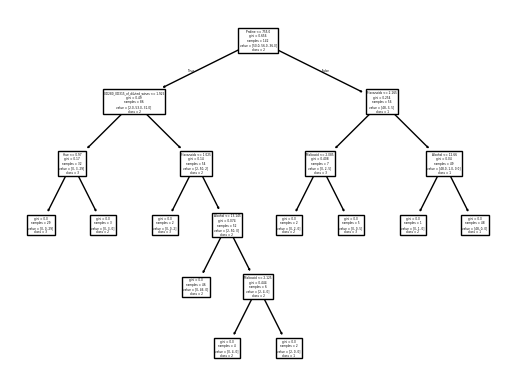

In [12]:
model = tree.DecisionTreeClassifier()

model.fit(x_train80, y_train80.to_numpy().ravel())

model_pred = model.predict(x_test20)

print(confusion_matrix(y_test20, model_pred))
print(classification_report(y_test20, model_pred))

tree.plot_tree(model, feature_names = wine.data.headers, class_names = ['1', '2', '3'])

wine_tree_8020 = Classifier('Decision Tree 80/20', accuracy_score(y_test20, model_pred), confusion_matrix(y_test20, model_pred), classification_report(y_test20, model_pred))

50/50

[[30  2  0]
 [ 3 26  1]
 [ 0  4 23]]
              precision    recall  f1-score   support

           1       0.91      0.94      0.92        32
           2       0.81      0.87      0.84        30
           3       0.96      0.85      0.90        27

    accuracy                           0.89        89
   macro avg       0.89      0.89      0.89        89
weighted avg       0.89      0.89      0.89        89



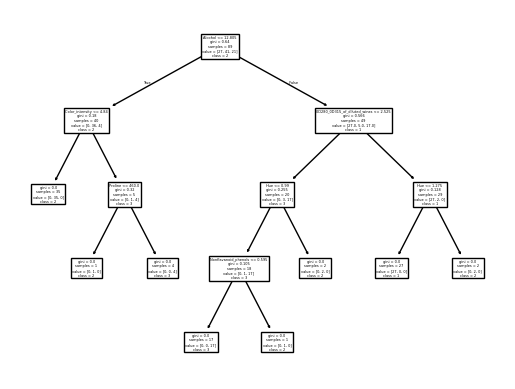

In [13]:
model = tree.DecisionTreeClassifier()

model.fit(x_train50, y_train50.to_numpy().ravel())

model_pred = model.predict(x_test50)

print(confusion_matrix(y_test50, model_pred))
print(classification_report(y_test50, model_pred))

tree.plot_tree(model, feature_names = wine.data.headers, class_names = ['1', '2', '3'])

wine_tree_5050 = Classifier('Decision Tree 50/50', accuracy_score(y_test50, model_pred), confusion_matrix(y_test50, model_pred), classification_report(y_test50, model_pred))

# Naive Bayes


In [14]:
model = GaussianNB()

model.fit(x_train80, y_train80.to_numpy().ravel())

model_pred = model.predict(x_test20)

print(confusion_matrix(y_test20, model_pred))
print(classification_report(y_test20, model_pred))

wine_bayes_8020 = Classifier('Naïve-Bayes 80/20', accuracy_score(y_test20, model_pred), confusion_matrix(y_test20, model_pred), classification_report(y_test20, model_pred))

[[ 9  0  0]
 [ 1 14  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           1       0.90      1.00      0.95         9
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [15]:
model = GaussianNB()

model.fit(x_train50, y_train50.to_numpy().ravel())

model_pred = model.predict(x_test50)

print(confusion_matrix(y_test50, model_pred))
print(classification_report(y_test50, model_pred))

wine_bayes_5050 = Classifier('Naïve-Bayes 50/50', accuracy_score(y_test50, model_pred), confusion_matrix(y_test50, model_pred), classification_report(y_test50, model_pred))

[[32  0  0]
 [ 0 30  0]
 [ 0  0 27]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        27

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



# **DNN**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
def build_dnn(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(4, activation='softmax'))  # Softmax para clasificación multiclase
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

IRIS 80/20

In [20]:
iris_dnn_model = build_dnn(input_dim=x_train80.shape[1], output_dim=len(np.unique(y)))
iris_dnn_model.fit(x_train80, y_train80, epochs=50, batch_size=16, verbose=1)

dnn_pred = np.argmax(iris_dnn_model.predict(x_test20), axis=1)
print(confusion_matrix(y_test20, dnn_pred))
print(classification_report(y_test20, dnn_pred))

iris_dnn_8020 = Classifier('DNN 80/20', accuracy_score(y_test20, dnn_pred), confusion_matrix(y_test20, dnn_pred), classification_report(y_test20, dnn_pred))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2950 - loss: 57.3162
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3420 - loss: 18.7444 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2444 - loss: 6.4589 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3137 - loss: 3.0700 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3540 - loss: 2.0119 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4743 - loss: 1.4112 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5436 - loss: 1.2289 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4342 - loss: 1.0029 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5643 - loss: 0.9411 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - loss: 0.7621 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6620 - loss: 0.8853 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6185 - loss: 0.7125 
Epoch 13/50

50/50

In [21]:
iris_dnn_model = build_dnn(input_dim=x_train50.shape[1], output_dim=len(np.unique(y)))

y_train50 = y_train50.astype(int)
y_test50 = y_test50.astype(int)

iris_dnn_model.fit(x_train50, y_train50, epochs=50, batch_size=16, verbose=1)

dnn_pred = np.argmax(iris_dnn_model.predict(x_test50), axis=1)
print("Confusion Matrix (Iris 50/50):")
print(confusion_matrix(y_test50, dnn_pred))
print("Classification Report (Iris 50/50):")
print(classification_report(y_test50, dnn_pred))

iris_dnn_5050 = Classifier('DNN 50/50', accuracy_score(y_test50, dnn_pred), confusion_matrix(y_test50, dnn_pred), classification_report(y_test50, dnn_pred))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4302 - loss: 84.5766
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2147 - loss: 18.9073  
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3238 - loss: 18.7383 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1249 - loss: 9.9994  
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2343 - loss: 11.6753 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1644 - loss: 9.9439 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1226 - loss: 7.6865 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1625 - loss: 5.7504 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2456 - loss: 3.9826 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2404 - loss: 4.4677  
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2427 - loss: 2.4088  
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3719 - loss: 1.9979 
Epoch

WINE 80/20

In [22]:
wine_dnn_model = build_dnn(input_dim=x_train80.shape[1], output_dim=len(np.unique(y)))

wine_dnn_model.fit(x_train80, y_train80, epochs=50, batch_size=16, verbose=1)

dnn_pred = np.argmax(wine_dnn_model.predict(x_test20), axis=1)
print(confusion_matrix(y_test20, dnn_pred))
print(classification_report(y_test20, dnn_pred))

wine_dnn_8020 = Classifier('DNN 80/20', accuracy_score(y_test20, dnn_pred), confusion_matrix(y_test20, dnn_pred), classification_report(y_test20, dnn_pred))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0802 - loss: 109.2629   
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3188 - loss: 38.9370 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3855 - loss: 4.5348 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5511 - loss: 4.3818 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6483 - loss: 2.2652 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3177 - loss: 2.0096 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6673 - loss: 1.2040 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5547 - loss: 0.9388 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5765 - loss: 0.8666 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5320 - loss: 0.9296 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5864 - loss: 0.8622 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6324 - loss: 0.7986 
Epoch 1

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[ 8  1  0]
 [ 0 14  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

           1       1.00      0.89      0.94         9
           2       0.93      0.93      0.93        15
           3       0.92      1.00      0.96        12

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



50/50

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3213 - loss: 115.5833
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2522 - loss: 43.0957 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2550 - loss: 13.9232 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5001 - loss: 5.5810 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5959 - loss: 4.6383 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6009 - loss: 2.3491 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5639 - loss: 1.8478 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6677 - loss: 2.0854 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4985 - loss: 1.2421 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7134 - loss: 1.3968 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5416 - loss: 1.0844 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6931 - loss: 1.1859 
Epoch 13/

IRIS DATASET COMPARISON
80/20 & 50/50

In [ ]:
models = [iris_tree_8020, iris_bayes_8020, iris_knn_8020, iris_dnn_8020]
data = {
    'Model': [m.name for m in models],
    'Accuracy': [m.accuracy for m in models],
}
table_iris_8020 = pd.DataFrame(data)
table_iris_8020

In [ ]:
models = [iris_tree_5050, iris_bayes_5050, iris_knn_5050, iris_dnn_5050]
data = {
    'Model': [m.name for m in models],
    'Accuracy': [m.accuracy for m in models],
}
table_iris_5050 = pd.DataFrame(data)
table_iris_5050

WINE DATASET COMPARISON
80/20 &50/50

In [ ]:
models = [wine_tree_8020, wine_bayes_8020, wine_knn_8020, wine_dnn_8020]
data = {
    'Model': [m.name for m in models],
    'Accuracy': [m.accuracy for m in models],
}
table_wine_8020 = pd.DataFrame(data)
table_wine_8020


models = [wine_tree_5050, wine_bayes_5050, wine_knn_5050, wine_dnn_5050]
data = {
    'Model': [m.name for m in models],
    'Accuracy': [m.accuracy for m in models],
}
table_wine_5050 = pd.DataFrame(data)
table_wine_5050